In [1]:
pip install tensorflow keras sklearn matplotlib pandas pil

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


# IMPORTING LIBRARIES 

In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D as Conv2D, MaxPooling2D as MaxPool2D

# EXTRACTING THE DATASET

In [11]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#there are 43 kinds of traffic sign boards in the dataset, hence the no. of of classes is taken as 43.
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    #we open each folder and extract the images and store in the list data[]
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
#We need to convert the list into numpy arrays for feeding to the model.
data = np.array(data)
labels = np.array(labels)

# we have stored all the images and their labels into lists (data and labels).


In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
#random_state indicates the highest number of the folder
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


There are 39209 images German Traffic Sign Recognition Benchmark(GTSRB) Dataset
30 * 30 indicates the image size after resizing it to reduce computational complexities
3 indicates the layers RGB

# BUILDING CNN MODEL 

In [13]:
#Building the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
#we first add two 2-D convolutional layers to the model with 32 filters each
#kernel size is 5*5 which will move around the image to get features.
#activation function used is rectified linear (ReLu) fuction.

model.add(MaxPool2D(pool_size=(2, 2)))
#then we do max pooling, to reduce the amount of parameters and computation in the network.

model.add(Dropout(rate=0.25))
#Dropout is a technique where randomly selected neurons are ignored during training to prevent overfitting

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
#now again two convolutional layers with 64 filters each and 3*3 kernel size are added  and maxpooling, dropout is done

model.add(Flatten())
#a flattening layer is used to convert data/image into 1-D array

model.add(Dense(256, activation='relu'))
#a dense layer is added,for being fully connected to the previous layer

model.add(Dropout(rate=0.5))
#dropout layer added to avoid overfitting

model.add(Dense(43, activation='softmax'))
#a softmax layer is added to convert an array of numbers into array of probabilities of occurence of a feature

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss is “categorical_crossentropy” because we have multiple classes to categorise.
#metrics is chosen to be accuracy, because we wish to optimise it
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

# TRAINING THE MODEL

In [14]:
#epoch is the number of times the neural network is trained with the whole dataset
#in each epoch the dataset is divided into batches of size 32
#we train the model with the training dataset divided and validate using validating dataset
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 86s 85ms/step - loss: 1.7602 - accuracy: 0.5518 - val_loss: 0.2938 - val_accuracy: 0.9290
Epoch 2/20
981/981 [==============================] - 79s 80ms/step - loss: 0.4449 - accuracy: 0.8771 - val_loss: 0.1171 - val_accuracy: 0.9705
Epoch 3/20
981/981 [==============================] - 91s 93ms/step - loss: 0.2815 - accuracy: 0.9231 - val_loss: 0.0827 - val_accuracy: 0.9774
Epoch 4/20
981/981 [==============================] - 84s 86ms/step - loss: 0.2472 - accuracy: 0.9326 - val_loss: 0.1263 - val_accuracy: 0.9689
Epoch 5/20
981/981 [==============================] - 85s 86ms/step - loss: 0.2168 - accuracy: 0.9418 - val_loss: 0.0425 - val_accuracy: 0.9890
Epoch 6/20
981/981 [==============================] - 86s 87ms/step - loss: 0.2321 - accuracy: 0.9393 - val_loss: 0.0716 - val_accuracy: 0.9797
Epoch 7/20
981/981 [==============================] - 85s 87ms/step - loss: 0.2139 - accuracy: 0.9484 - val_loss: 0.0466 - val_accuracy:

Usually with every epoch increasing, loss should be going lower and accuracy should be going higher.
But with val_loss(keras validation loss) and val_acc(keras validation accuracy), many cases can be possible like below:
(1) val_loss starts increasing, val_acc starts decreasing. This means model is cramming values not learning
(2) val_loss starts increasing, val_acc also increases.This could be case of overfitting or diverse probability values in cases where softmax is being used in output layer
(3) val_loss starts decreasing, val_acc starts increasing. This is also fine as that means model built is learning and working fine.

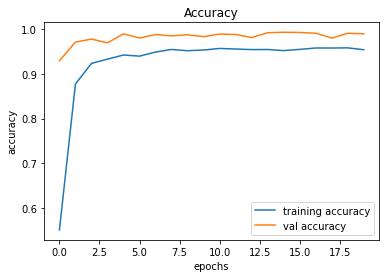

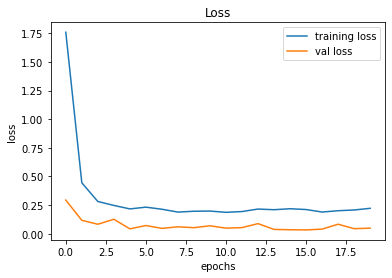

In [15]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# TESTING THE MODEL

In [3]:
from keras.models import load_model

model = load_model('traffic_classifier.h5')

[16  1 38 ...  2  7 10]
[16  1 38 ...  6  7 10]


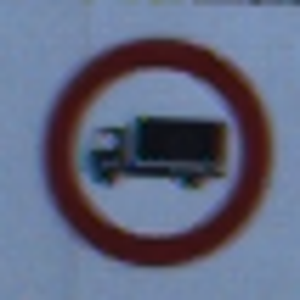

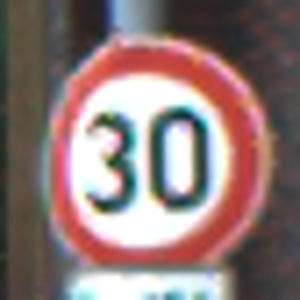

0.9566904196357878


In [4]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
list1 = []
i = 0
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    if i<2:
        image = Image.open(img)
        image = image.resize((300,300))
        list1.append(image)
        i=i+1

#we access all the test images from each folder in test dataset and convert it into numpy array    
X_test=np.array(data)

predict_x=model.predict(X_test)       #predicted values
classes_x=np.argmax(predict_x,axis=1) #Actual values
print(classes_x)
print(labels)
for imageName in list1:
    display(imageName)
#pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x)) 
#Then we check the accuracy of our classification model which is 96%

In [18]:
model.save('traffic_Classifier.h5')

In [5]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(classes_x, labels)

print(cf_matrix)

[[ 60   0   0 ...   0   0   0]
 [  0 707   2 ...   1   0   0]
 [  0   3 737 ...   1   0   0]
 ...
 [  0   0   0 ...  82   0   1]
 [  0   0   0 ...   0  54   0]
 [  0   0   0 ...   0   0  87]]


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


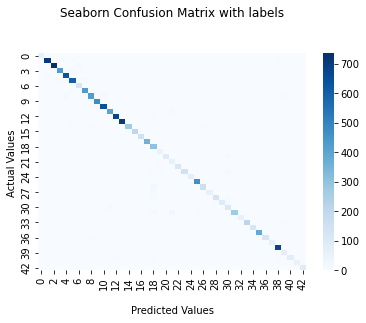

In [9]:
import seaborn as sns

ax = sns.heatmap(cf_matrix,cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
#Dark colour indicates more predictions for those values
plt.show()

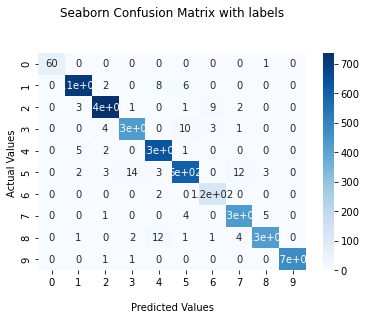

In [13]:
import seaborn as sns

ax = sns.heatmap(cf_matrix[0:10,0:10],annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
#Dark colour indicates more predictions for those values
plt.show()

In [29]:
FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)
FP = FP.sum()
FN = FN.sum()
TP = TP.sum()
TN = TN.sum()
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
ACC = (TP+TN)/(TP+FP+FN+TN)
print("TPR =",TPR)
print("TNR =",TNR)
print("FPR =",FPR)
print("FNR =",FNR)
print("Accuracy =",ACC)

TPR = 0.9566904196357878
TNR = 0.9989688195151378
FPR = 0.0010311804848621951
FNR = 0.043309580364212195
Accuracy = 0.9979856009132925
